<a href="https://colab.research.google.com/github/devikaajay/Assignment_on_clustering/blob/main/Assign_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
import numpy as np

Loading dataset

In [9]:
df = pd.read_csv('Wine_clust.csv')

print("Original Data Head:")
print(df.head())
print("\nData Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Original Data Head:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17    

Scaling

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

print("\nScaled Data Head:")
print(scaled_df.head())


Scaled Data Head:
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051

K Means Clustering

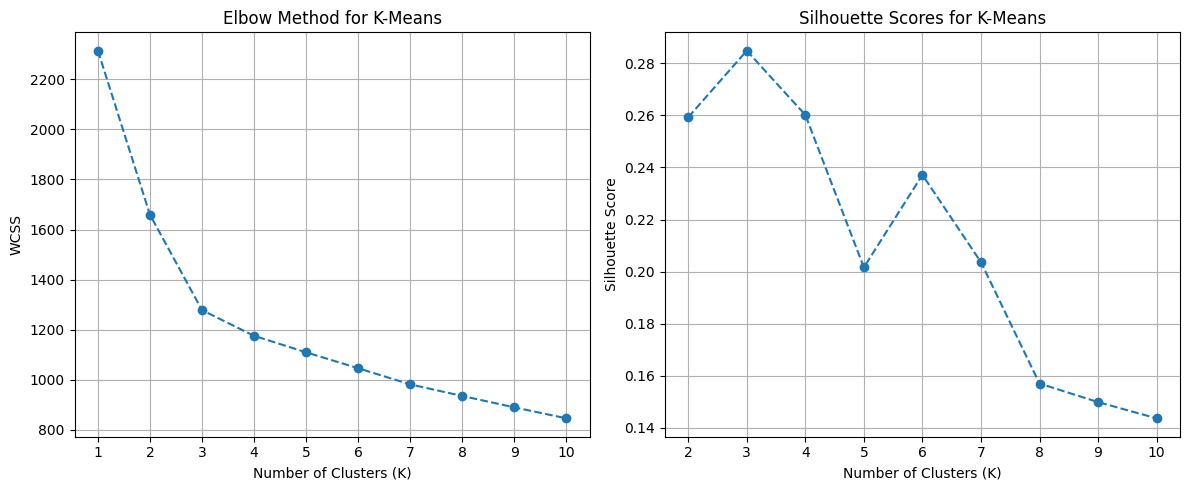


K-Means: Optimal K based on Silhouette Score: 3
K-Means: Optimal K (highest silhouette score): 3 with score: 0.285

K-Means Model with 3 Clusters:
Cluster sizes: 0    65
1    51
2    62
Name: count, dtype: int64


In [11]:
wcss = []
silhouette_scores_kmeans = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    if i > 1:
        score = silhouette_score(scaled_df, kmeans.labels_)
        silhouette_scores_kmeans.append(score)
    else:
        silhouette_scores_kmeans.append(None)

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores_kmeans[1:], marker='o', linestyle='--')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_k_silhouette = 2 + np.argmax(silhouette_scores_kmeans[1:])
print(f"\nK-Means: Optimal K based on Silhouette Score: {optimal_k_silhouette}")

max_sil_score_kmeans = 0
optimal_k_kmeans = 0
for i, score in enumerate(silhouette_scores_kmeans):
    if score is not None and score > max_sil_score_kmeans:
        max_sil_score_kmeans = score
        optimal_k_kmeans = i + 1

print(f"K-Means: Optimal K (highest silhouette score): {optimal_k_kmeans} with score: {max_sil_score_kmeans:.3f}")

final_kmeans_model = KMeans(n_clusters=optimal_k_kmeans, init='k-means++', random_state=42, n_init=10)
kmeans_labels = final_kmeans_model.fit_predict(scaled_df)
print(f"\nK-Means Model with {optimal_k_kmeans} Clusters:")
print("Cluster sizes:", pd.Series(kmeans_labels).value_counts().sort_index())

Agglomerative Hierarchical Clustering

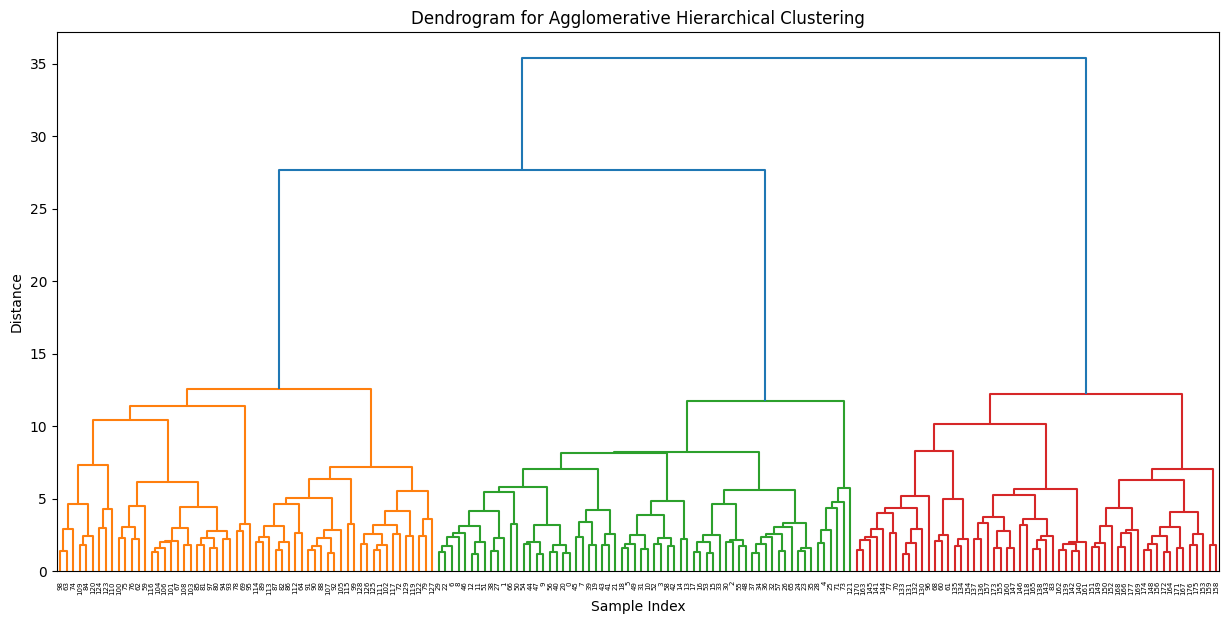

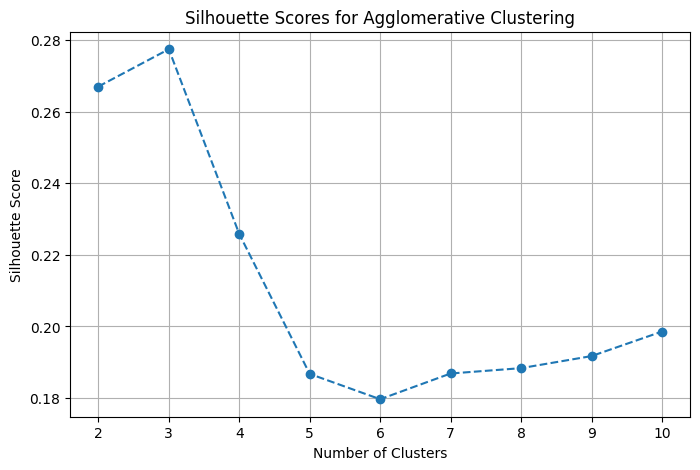

Agglomerative Clustering: Optimal Number of Clusters based on Silhouette Score: 3

Agglomerative Clustering Model with 3 Clusters:
Cluster sizes: 0    58
1    56
2    64
Name: count, dtype: int64


In [12]:
linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

silhouette_scores_agg = []
for n_clusters in range(2, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agg_clustering.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, agg_labels)
    silhouette_scores_agg.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores_agg, marker='o', linestyle='--')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True)
plt.show()

optimal_n_agg_silhouette = 2 + np.argmax(silhouette_scores_agg)
print(f"Agglomerative Clustering: Optimal Number of Clusters based on Silhouette Score: {optimal_n_agg_silhouette}")

final_agg_model = AgglomerativeClustering(n_clusters=optimal_n_agg_silhouette, linkage='ward')
agg_labels = final_agg_model.fit_predict(scaled_df)
print(f"\nAgglomerative Clustering Model with {optimal_n_agg_silhouette} Clusters:")
print("Cluster sizes:", pd.Series(agg_labels).value_counts().sort_index())

DBSCAN Clustering


DBSCAN: Using min_samples = 26 (2 * number of features)


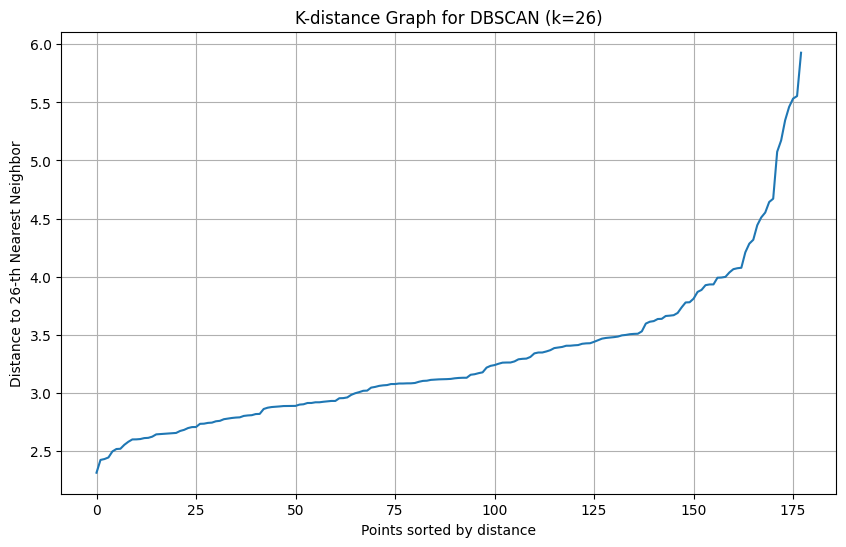


DBSCAN: Exploring different eps values:
  Epsilon (eps): 1.5, Min Samples: 26
    Number of Clusters: 0
    Number of Noise Points: 178
------------------------------
  Epsilon (eps): 2.0, Min Samples: 26
    Number of Clusters: 0
    Number of Noise Points: 178
------------------------------
  Epsilon (eps): 2.5, Min Samples: 26
    Number of Clusters: 1
    Number of Noise Points: 130
------------------------------
  Epsilon (eps): 3.0, Min Samples: 26
    Number of Clusters: 2
    Number of Noise Points: 20
    Silhouette Score (excluding noise): 0.299
------------------------------

Optimal DBSCAN Model chosen based on highest silhouette score:
  Epsilon (eps): 3.0, Min Samples: 26
  Final Number of Clusters: 2
  Final Number of Noise Points: 20
  Cluster sizes (including noise as -1):
-1     20
 0    112
 1     46
Name: count, dtype: int64


In [13]:
n_features = scaled_df.shape[1]
min_samples_dbscan = 2 * n_features
print(f"\nDBSCAN: Using min_samples = {min_samples_dbscan} (2 * number of features)")

neighbors = NearestNeighbors(n_neighbors=min_samples_dbscan)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

distances = np.sort(distances[:, min_samples_dbscan-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'K-distance Graph for DBSCAN (k={min_samples_dbscan})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples_dbscan}-th Nearest Neighbor')
plt.grid(True)
plt.show()

potential_eps_values = [1.5, 2.0, 2.5, 3.0]

print("\nDBSCAN: Exploring different eps values:")
best_dbscan_score = -1
best_eps = None
best_min_samples = None
best_dbscan_model = None

for eps_val in potential_eps_values:
    dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_dbscan)
    dbscan_labels = dbscan.fit_predict(scaled_df)

    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_points = list(dbscan_labels).count(-1)

    print(f"  Epsilon (eps): {eps_val}, Min Samples: {min_samples_dbscan}")
    print(f"    Number of Clusters: {n_clusters_dbscan}")
    print(f"    Number of Noise Points: {n_noise_points}")

    if n_clusters_dbscan > 1:
        core_samples_mask = dbscan_labels != -1
        score = silhouette_score(scaled_df[core_samples_mask], dbscan_labels[core_samples_mask])
        print(f"    Silhouette Score (excluding noise): {score:.3f}")
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_eps = eps_val
            best_min_samples = min_samples_dbscan
            best_dbscan_model = dbscan

    print("-" * 30)

if best_dbscan_model:
    print(f"\nOptimal DBSCAN Model chosen based on highest silhouette score:")
    print(f"  Epsilon (eps): {best_eps}, Min Samples: {best_min_samples}")
    dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan_final_labels = dbscan_final.fit_predict(scaled_df)
    n_clusters_final_dbscan = len(set(dbscan_final_labels)) - (1 if -1 in dbscan_final_labels else 0)
    n_noise_points_final = list(dbscan_final_labels).count(-1)

    print(f"  Final Number of Clusters: {n_clusters_final_dbscan}")
    print(f"  Final Number of Noise Points: {n_noise_points_final}")
    print("  Cluster sizes (including noise as -1):")
    print(pd.Series(dbscan_final_labels).value_counts().sort_index())
else:
    print("\nCould not find an optimal DBSCAN model with clusters (all points might be noise or single cluster).")

 Gaussian Mixture Models (GMM)

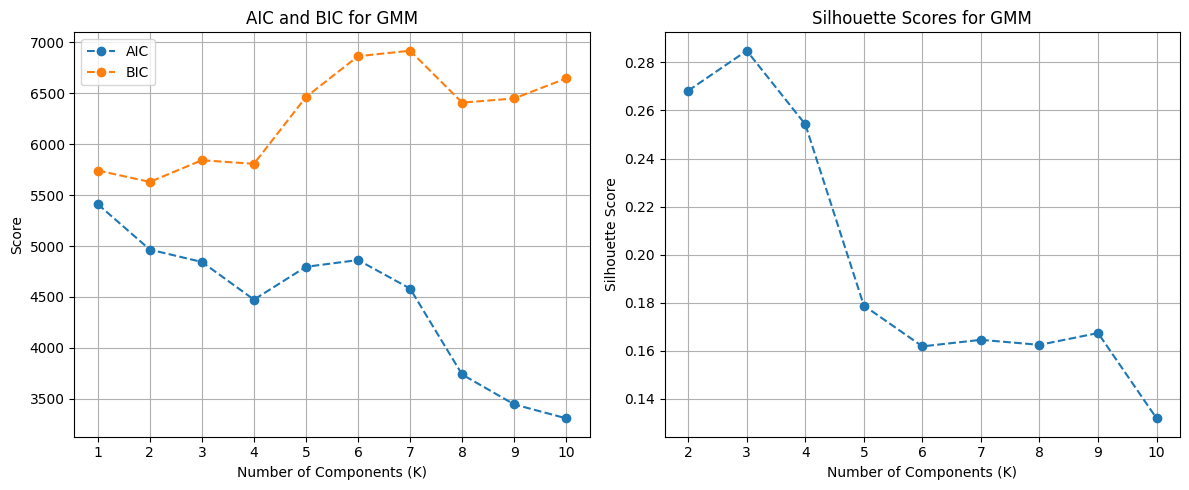

GMM: Optimal K based on AIC: 10
GMM: Optimal K based on BIC: 2
GMM: Optimal K based on Silhouette Score: 3 with score: 0.285

GMM Model with 2 Components:
Cluster sizes:
 0    122
1     56
Name: count, dtype: int64


In [14]:

aic_scores = []
bic_scores = []
silhouette_scores_gmm = []

for n_components in range(1, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_df)
    aic_scores.append(gmm.aic(scaled_df))
    bic_scores.append(gmm.bic(scaled_df))

    if n_components > 1:
        gmm_labels = gmm.predict(scaled_df)
        score = silhouette_score(scaled_df, gmm_labels)
        silhouette_scores_gmm.append(score)
    else:
        silhouette_scores_gmm.append(None)
# Plotting AIC and BIC
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), aic_scores, marker='o', linestyle='--', label='AIC')
plt.plot(range(1, max_clusters + 1), bic_scores, marker='o', linestyle='--', label='BIC')
plt.title('AIC and BIC for GMM')
plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.xticks(range(1, max_clusters + 1))
plt.legend()
plt.grid(True)

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
if len(silhouette_scores_gmm) > 1:
    plt.plot(range(2, max_clusters + 1), silhouette_scores_gmm[1:], marker='o', linestyle='--')
    plt.title('Silhouette Scores for GMM')
    plt.xlabel('Number of Components (K)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)
plt.tight_layout()
plt.show()

optimal_gmm_aic = np.argmin(aic_scores) + 1
optimal_gmm_bic = np.argmin(bic_scores) + 1

if len(silhouette_scores_gmm) > 1 and any(score is not None for score in silhouette_scores_gmm[1:]):
    optimal_gmm_silhouette = 2 + np.argmax([s for s in silhouette_scores_gmm[1:] if s is not None])
    max_sil_score_gmm = np.max([s for s in silhouette_scores_gmm[1:] if s is not None])
else:
    optimal_gmm_silhouette = 1
    max_sil_score_gmm = 0


print(f"GMM: Optimal K based on AIC: {optimal_gmm_aic}")
print(f"GMM: Optimal K based on BIC: {optimal_gmm_bic}")
print(f"GMM: Optimal K based on Silhouette Score: {optimal_gmm_silhouette} with score: {max_sil_score_gmm:.3f}")

final_gmm_n_components = optimal_gmm_bic
final_gmm_model = GaussianMixture(n_components=final_gmm_n_components, random_state=42)
final_gmm_model.fit(scaled_df)
gmm_labels = final_gmm_model.predict(scaled_df)

print(f"\nGMM Model with {final_gmm_n_components} Components:")
print("Cluster sizes:\n", pd.Series(gmm_labels).value_counts().sort_index())